# Development rig

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from waterwaves1.wave import wave1
from waterwaves1.packing import unpack1
from waterwaves1.fourier import IEj

In [161]:
L_d=32
Hmx_d=(0.141063*L_d+0.0095721*L_d**2+0.0077829*L_d**3)/(1+0.0788340*L_d+0.0317567*L_d**2+0.0093407*L_d**3)
d=2*np.pi/L_d
N,h,s=70,0.15,d*(1+0*Hmx_d)
H_d=h*Hmx_d
Ur=L_d**2*h*Hmx_d
Ur,d,H_d,Hmx_d

(120.9278083180229,
 0.19634954084936207,
 0.11809356281056924,
 0.7872904187371282)

In [162]:
sol1=wave1(N,h*Hmx_d*d,d=d,scaler=s)
Ej1,Q1,R1=unpack1(sol1.x)
sol1.success

True

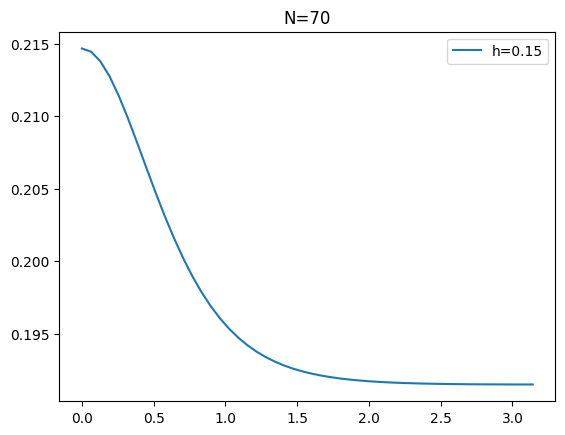

array([ 8.17761271e-03,  5.11785422e-03,  2.68818712e-03,  1.28676884e-03,
        5.86640469e-04,  2.60666608e-04,  1.14351452e-04,  4.99130574e-05,
        2.17836355e-05,  9.53555885e-06,  4.19469749e-06,  1.85639439e-06,
        8.26937654e-07,  3.70804600e-07,  1.67342119e-07,  7.59802639e-08,
        3.46930124e-08,  1.59228922e-08,  7.34227416e-09,  3.39991549e-09,
        1.58035939e-09,  7.37125040e-10,  3.44900514e-10,  1.61844965e-10,
        7.61463884e-11,  3.59123657e-11,  1.69740845e-11,  8.03896709e-12,
        3.81426725e-12,  1.81298160e-12,  8.63110632e-13,  4.11628922e-13,
        1.96558070e-13,  9.40630931e-14,  4.50444794e-14,  2.16653221e-14,
        1.03864856e-14,  5.04879040e-15,  2.42663539e-15,  1.23243789e-15,
        5.85399362e-16,  3.27549554e-16,  1.55913577e-16,  1.17561879e-16,
        4.07714084e-17,  7.62377353e-17,  2.63989100e-17,  4.76061614e-17,
        1.83342827e-17,  5.10923267e-17,  2.37749413e-17,  5.12561212e-17,
        1.54134846e-17,  

In [163]:
X=np.linspace(0,np.pi)
plt.plot(X,IEj([d,*Ej1],X),label=f"h={h}")
plt.legend()
plt.title(f"N={N}")
plt.show()
Ej1

In [164]:
from waterwaves1.grids import grids
from waterwaves1.boundary import CSEm_Ejg

def a_Ejg(Ej,d,g):
    CEmj,SEmj,Etam=CSEm_Ejg(Ej,d,g)
    return np.hstack([-Etam.reshape(N+1,1),(SEmj*g.CXmj)])

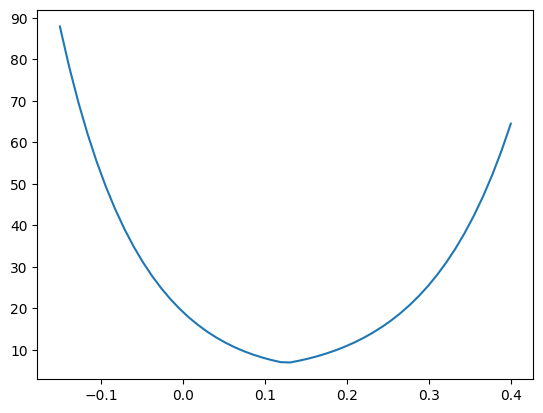

In [165]:
ss=np.linspace(-0.15,0.4)
SS=d*(1+ss*Hmx_d)
Cnd=[]
for s in SS:
    g=grids(N,s)        
    Cnd+=[np.linalg.cond(a_Ejg(Ej1,d,g))]

plt.plot(ss,Cnd)